In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp
import math
import plotly 
import plotly.graph_objs as go
import plotly.express as px

In [2]:
df_continents = pd.read_csv('../data/continents_countries.csv')

In [3]:
df_continents.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df_continents.rename(columns={'Three_Letter_Country_Code': 'Code'}, inplace=True)

In [5]:
df_continents.columns

Index(['Continent_Name', 'Code'], dtype='object')

# Does Tobacco has an influence on lung cancer? 
Looking at the amount of cigarettes sold

In [6]:
df_cigs = pd.read_csv('../data/cigs.csv')

In [7]:
df_lung = pd.read_csv('../data/lung_cancer.csv')

In [8]:
df_cigs.head(3)

,Country,Code,Cig_sold_per_adult_per_day,Year
0,Armenia,ARM,6.644444,9
1,Australia,AUS,5.257143,21
2,Austria,AUT,5.800000,15


In [9]:
df_lung.head()

,Country,Code,"Lung cancer(per 100,000)"
0,Afghanistan,AFG,13.063858
1,Albania,ALB,24.118825
2,Algeria,DZA,9.365556
3,American Samoa,ASM,25.845224
4,Andorra,AND,29.440286


In [10]:
#pd.concat([df1, df2], 1).dropna().mean(axis=1, level=0)

In [11]:
df = pd.merge(df_cigs, df_lung, on=['Code','Country'])

In [12]:
df.head()

,Country,Code,Cig_sold_per_adult_per_day,Year,"Lung cancer(per 100,000)"
0,Armenia,ARM,6.644444,9,29.032522
1,Australia,AUS,5.257143,21,25.690619
2,Austria,AUT,5.800000,15,25.163282
3,Azerbaijan,AZE,3.444444,9,18.500159
4,Belarus,BLR,4.844444,9,26.891262


In [13]:
df1 = df.loc[df.Year>=20].copy()

In [14]:
df1 = df1.reset_index(drop=True)

In [15]:
df1.head()

,Country,Code,Cig_sold_per_adult_per_day,Year,"Lung cancer(per 100,000)"
0,Australia,AUS,5.257143,21,25.690619
1,Belgium,BEL,6.236364,22,38.940814
2,Bulgaria,BGR,7.234783,23,25.663744
3,Canada,CAN,4.976190,21,38.674088
4,Croatia,HRV,5.980952,21,35.493885


In [16]:
cols =  ['Country','Code','Cig_sold_per_adult_per_day' ,'Lung cancer(per 100,000)','Year']

In [17]:
df1 = df1[cols]

In [18]:
df1.head()

,Country,Code,Cig_sold_per_adult_per_day,"Lung cancer(per 100,000)",Year
0,Australia,AUS,5.257143,25.690619,21
1,Belgium,BEL,6.236364,38.940814,22
2,Bulgaria,BGR,7.234783,25.663744,23
3,Canada,CAN,4.976190,38.674088,21
4,Croatia,HRV,5.980952,35.493885,21


In [19]:
df2 = df1.rename(columns={"Year": "Nbr of cumulated years"})

In [20]:
df2 = df2.merge(df_continents, on='Code')

In [21]:
#df2['Continent']= df2['Country'].map(continent_dict)

In [22]:
df2.head()

,Country,Code,Cig_sold_per_adult_per_day,"Lung cancer(per 100,000)",Nbr of cumulated years,Continent_Name
0,Australia,AUS,5.257143,25.690619,21,Oceania
1,Belgium,BEL,6.236364,38.940814,22,Europe
2,Bulgaria,BGR,7.234783,25.663744,23,Europe
3,Canada,CAN,4.976190,38.674088,21,North America
4,Croatia,HRV,5.980952,35.493885,21,Europe


In [23]:
df2.describe()

,Cig_sold_per_adult_per_day,"Lung cancer(per 100,000)",Nbr of cumulated years
count,32.000000,32.000000,32.000000
mean,5.628997,31.808715,22.687500
std,1.146719,7.102317,1.891194
min,3.780000,20.454648,20.000000
25%,4.968143,27.011393,21.000000
50%,5.278571,30.678369,22.500000
75%,6.238636,35.551938,25.000000
max,9.139130,52.340454,26.000000


In [24]:
df2.corr()

,Cig_sold_per_adult_per_day,"Lung cancer(per 100,000)",Nbr of cumulated years
Cig_sold_per_adult_per_day,1.000000,0.267219,-0.057294
"Lung cancer(per 100,000)",0.267219,1.000000,-0.023753
Nbr of cumulated years,-0.057294,-0.023753,1.000000


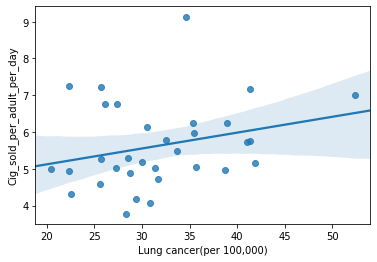

In [25]:
sns.regplot(x="Lung cancer(per 100,000)", y="Cig_sold_per_adult_per_day", data=df2)

In [26]:
df3 = df2.pivot_table(index=['Continent_Name'],values=['Cig_sold_per_adult_per_day','Lung cancer(per 100,000)'],aggfunc={'Lung cancer(per 100,000)':np.mean,'Cig_sold_per_adult_per_day':'mean'}).copy()

In [27]:
df3

,Cig_sold_per_adult_per_day,"Lung cancer(per 100,000)"
Continent_Name,,
Asia,6.100846,22.361979
Europe,5.721418,32.254580
North America,5.066095,40.249008
Oceania,4.518571,27.018914


In [28]:
df4 = df3.reset_index()

In [29]:
df4

,Continent_Name,Cig_sold_per_adult_per_day,"Lung cancer(per 100,000)"
0,Asia,6.100846,22.361979
1,Europe,5.721418,32.254580
2,North America,5.066095,40.249008
3,Oceania,4.518571,27.018914


In [38]:
def create_generator(continent_list):
    for continent in continent_list:
        yield continent
        
continents = create_generator(df4.Continent_Name.tolist())

In [39]:
fig = px.scatter(df4, x="Lung cancer(per 100,000)", y="Cig_sold_per_adult_per_day",size="Lung cancer(per 100,000)", color="Continent_Name",title="Cigarettes and Lung Cancer",
           hover_name="Continent_Name", size_max=40)

fig.update_xaxes(title='Cigarettes sold per adult per day')
fig.update_yaxes(title='Lung Cancer per 100,000')


fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)


fig.show()

In [34]:
fig = px.scatter(df2, x="Cig_sold_per_adult_per_day", y="Lung cancer(per 100,000)",title="Cigarettes and Lung Cancer", trendline="ols")

fig.update_xaxes(title='Cigarettes sold per adult per day')
fig.update_yaxes(title='Lung cancer per 100,000')

fig.show()

In [33]:
fig = px.choropleth(df2, locations="Code",
                    color="Lung cancer(per 100,000)", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title="Heat Map of the World representing lung cancer")
fig.show()